# Regression using Neural Networks

**1. Loading the Data**

In [111]:
# importing libraries
import pandas as pd
import warnings
warnings.filterwarnings('ignore')
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from tensorflow import keras
import matplotlib.pyplot as plt

In [52]:
car_df = pd.read_csv('/content/CarPrice_Assignment.csv')

In [53]:
print(f'Car Dimensions : {car_df.shape}')

Car Dimensions : (205, 26)


In [54]:
car_df.head(3)

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0


**2. Data Preprocessing**

In [55]:
# dropping unwanted columns
car_df.drop(columns = ['car_ID', 'symboling'], inplace = True)

In [56]:
car_df.columns

Index(['CarName', 'fueltype', 'aspiration', 'doornumber', 'carbody',
       'drivewheel', 'enginelocation', 'wheelbase', 'carlength', 'carwidth',
       'carheight', 'curbweight', 'enginetype', 'cylindernumber', 'enginesize',
       'fuelsystem', 'boreratio', 'stroke', 'compressionratio', 'horsepower',
       'peakrpm', 'citympg', 'highwaympg', 'price'],
      dtype='object')

In [57]:
#checking null values
car_df.isna().sum()

,0
CarName,0
fueltype,0
aspiration,0
doornumber,0
carbody,0
drivewheel,0
enginelocation,0
wheelbase,0
carlength,0
carwidth,0


In [58]:
#dividing the dataframe
X = car_df.drop(columns = ['price'])
y = car_df['price']

In [59]:
X.shape

(205, 23)

In [60]:
# Encoding categorical data into numeric
catg_cols = car_df.select_dtypes(include = 'object').columns.tolist()

catg_df = (pd.get_dummies(car_df[catg_cols])).astype('int')

In [61]:
catg_df.head(3)

,CarName_Nissan versa,CarName_alfa-romero Quadrifoglio,CarName_alfa-romero giulia,CarName_alfa-romero stelvio,CarName_audi 100 ls,CarName_audi 100ls,CarName_audi 4000,CarName_audi 5000,CarName_audi 5000s (diesel),CarName_audi fox,...,cylindernumber_twelve,cylindernumber_two,fuelsystem_1bbl,fuelsystem_2bbl,fuelsystem_4bbl,fuelsystem_idi,fuelsystem_mfi,fuelsystem_mpfi,fuelsystem_spdi,fuelsystem_spfi
0,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
1,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
2,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0


In [62]:
#deleting original categorical columns
X.drop(columns = catg_cols, inplace = True)

In [63]:
X.shape

(205, 13)

In [64]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   wheelbase         205 non-null    float64
 1   carlength         205 non-null    float64
 2   carwidth          205 non-null    float64
 3   carheight         205 non-null    float64
 4   curbweight        205 non-null    int64  
 5   enginesize        205 non-null    int64  
 6   boreratio         205 non-null    float64
 7   stroke            205 non-null    float64
 8   compressionratio  205 non-null    float64
 9   horsepower        205 non-null    int64  
 10  peakrpm           205 non-null    int64  
 11  citympg           205 non-null    int64  
 12  highwaympg        205 non-null    int64  
dtypes: float64(7), int64(6)
memory usage: 20.9 KB


In [65]:
#concatenating the encoded cols with the X df
X = pd.concat([X, catg_df], axis = 1)

In [66]:
X.head(3)

,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,...,cylindernumber_twelve,cylindernumber_two,fuelsystem_1bbl,fuelsystem_2bbl,fuelsystem_4bbl,fuelsystem_idi,fuelsystem_mfi,fuelsystem_mpfi,fuelsystem_spdi,fuelsystem_spfi
0,88.6,168.8,64.1,48.8,2548,130,3.47,2.68,9.0,111,...,0,0,0,0,0,0,0,1,0,0
1,88.6,168.8,64.1,48.8,2548,130,3.47,2.68,9.0,111,...,0,0,0,0,0,0,0,1,0,0
2,94.5,171.2,65.5,52.4,2823,152,2.68,3.47,9.0,154,...,0,0,0,0,0,0,0,1,0,0


In [68]:
#data normalization
scaler = MinMaxScaler()
X[:] = scaler.fit_transform(X)

In [69]:
X.head(3)

,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,...,cylindernumber_twelve,cylindernumber_two,fuelsystem_1bbl,fuelsystem_2bbl,fuelsystem_4bbl,fuelsystem_idi,fuelsystem_mfi,fuelsystem_mpfi,fuelsystem_spdi,fuelsystem_spfi
0,0.058309,0.413433,0.316667,0.083333,0.411171,0.260377,0.664286,0.290476,0.125,0.262500,...,0,0,0,0,0,0,0,1,0,0
1,0.058309,0.413433,0.316667,0.083333,0.411171,0.260377,0.664286,0.290476,0.125,0.262500,...,0,0,0,0,0,0,0,1,0,0
2,0.230321,0.449254,0.433333,0.383333,0.517843,0.343396,0.100000,0.666667,0.125,0.441667,...,0,0,0,0,0,0,0,1,0,0


**3. Train Test Split**

In [71]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

In [73]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((164, 198), (41, 198), (164,), (41,))

**4. Building Neural Network Model**

In [78]:
model = keras.Sequential([

    #Input layer + first hidden layer
    keras.layers.Dense(300, input_shape = (198,), activation = 'relu'),

    #Second hidden layer
    keras.layers.Dense(150, activation = 'relu'),

    #Third hidden layer
    keras.layers.Dense(75, activation = 'relu'),

    #Output layer
    keras.layers.Dense(1),
])

In [79]:
#compilation
model.compile(optimizer = 'adam',
              loss = 'mean_squared_error',
              metrics = ['mae'])

In [81]:
model.fit(X_train, y_train, epochs = 50, batch_size = 3)

Epoch 1/50
55/55 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 12647571.0000 - mae: 2394.0325
Epoch 2/50
55/55 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 10142975.0000 - mae: 2167.5059
Epoch 3/50
55/55 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 6368089.5000 - mae: 1791.4102
Epoch 4/50
55/55 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 8149696.0000 - mae: 1997.6708
Epoch 5/50
55/55 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 7609643.5000 - mae: 1907.2130
Epoch 6/50
55/55 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 6298934.0000 - mae: 1772.5425
Epoch 7/50
55/55 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 4078924.7500 - mae: 1331.7067
Epoch 8/50
55/55 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 3743595.2500 - mae: 1333.7382
Epoch 9/50
55/55 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 4625232.5000 - mae: 1487.1652
Epoch 10/50
55/55 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 4342929.5000 - mae: 1406.4442
Epoch 11/50
55/55 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 3947551.7500 - mae: 1366.0140
Epoch 12/50
55/55 ━━━━━━━━━━

In [82]:
#evaluate
loss, accuracy = model.evaluate(X_test, y_test)
print(f'Loss : {loss}\nAccuracy : {accuracy}')

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 10854915.0000 - mae: 2213.6069  
Loss : 10320236.0
Accuracy : 2183.811279296875


In [83]:
pred = model.predict(X_test)

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step


In [93]:
pred = pred.reshape(-1)

In [98]:
y_test.head(3)

,price
15,30760.000
9,17859.167
100,9549.000


In [94]:
pred

array([26603.254 , 20589.299 , 10072.529 , 16783.54  , 26180.973 ,
        7555.765 ,  7578.073 ,  8144.1064, 11269.585 ,  8853.399 ,
       17484.822 ,  8689.302 , 17824.04  , 10440.287 , 39752.336 ,
        6909.598 ,  2482.4568, 12431.35  ,  9863.984 , 12075.421 ,
       10691.455 , 20331.19  ,  6367.401 ,  4249.729 ,  6972.236 ,
       27759.723 , 14331.267 , 14462.606 ,  6864.202 , 16307.794 ,
       28769.918 ,  6572.6807,  7522.3574, 24763.172 ,  9557.451 ,
       29895.86  , 14926.995 , 11335.514 ,  6649.7905, 13240.668 ,
        9441.247 ], dtype=float32)

In [100]:
# Convert y_test to a DataFrame and reset the index
y_test = pd.DataFrame(y_test).reset_index(drop=True)

In [101]:
y_test[:3]

,price
0,30760.000
1,17859.167
2,9549.000


In [104]:
# Convert predictions to a DataFrame
pred_df = pd.DataFrame(pred, columns=['Predicted'])

In [105]:
pred_df[:3]

,Predicted
0,26603.253906
1,20589.298828
2,10072.529297


In [109]:
#comparion
compare_df = pd.concat([y_test, pred_df], axis = 1)
compare_df.columns = ['Actual', 'Predicted']

In [110]:
compare_df.head()

,Actual,Predicted
0,30760.000,26603.253906
1,17859.167,20589.298828
2,9549.000,10072.529297
3,11850.000,16783.539062
4,28248.000,26180.972656


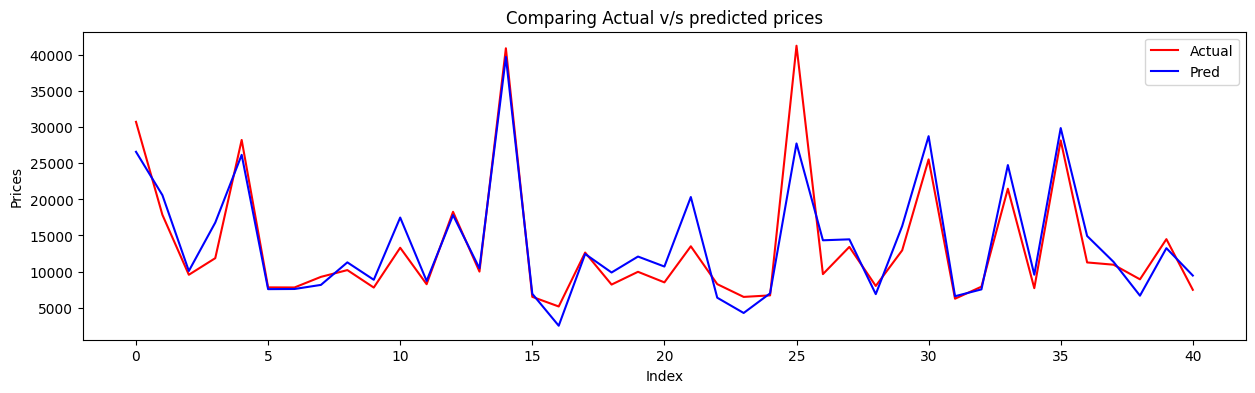

In [116]:
plt.rcParams['figure.figsize'] = (15, 4)

plt.plot(compare_df['Actual'], color = 'red', label = 'Actual');
plt.plot(compare_df['Predicted'], color = 'blue', label = 'Pred');
plt.title('Comparing Actual v/s predicted prices');
plt.xlabel('Index');
plt.ylabel('Prices');
plt.legend();